# Netflix User Rating Prediction Project


### Load the Dataset

We begin by loading the Netflix dataset using pandas. The dataset contains information about Netflix shows and movies such as title, type, country, release year, duration, and more.


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('netflix_titles.csv')

# Show the first 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Basic Information and Missing Values

Let’s explore the shape, column names, and missing data in the dataset. This will help us understand how clean the data is and which columns may need attention.


In [5]:
# Check the shape of the dataset (rows, columns)
print("Shape of the dataset:", df.shape)

# View column names
print("\nColumns:")
print(df.columns)

# Basic info about data types and non-null counts
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Shape of the dataset: (8807, 12)

Columns:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing values in

### Clean the Dataset

We'll remove columns that are either not useful or have too many missing values. We'll also drop rows with small amounts of missing data to keep the dataset clean and ready for analysis.


In [6]:
# Drop columns not useful for rating prediction
df.drop(['show_id', 'description', 'director'], axis=1, inplace=True)

# Optional: drop rows with any missing data (small % only)
df.dropna(inplace=True)

# Check the cleaned shape
print("Cleaned dataset shape:", df.shape)

Cleaned dataset shape: (7290, 9)


If you want to keep more data, you could fill missing values instead of dropping them:

In [ ]:

# df['country'].fillna('Unknown', inplace=True)
# df['cast'].fillna('Not Available', inplace=True)
# df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)
# df['rating'].fillna(df['rating'].mode()[0], inplace=True)
# df['duration'].fillna(df['duration'].mode()[0], inplace=True)


### Check Data Types

Now that we’ve cleaned the dataset, we’ll check the data types of all columns to identify which ones need to be converted for machine learning models.


In [7]:
# Check data types
df.dtypes


type            object
title           object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

### Prepare Categorical Columns for Encoding

Now that we know the data types, we need to decide how to handle categorical (text-based) columns. 

We will:
- Identify which columns are categorical
- Drop columns that are not useful for prediction (like 'title')
- Leave the rest for encoding in the next step


In [8]:
# View unique values in text columns to decide encoding strategy
print("\nUnique values in 'type':", df['type'].unique())
print("\nUnique values in 'rating':", df['rating'].unique())
print("\nUnique values in 'country':", df['country'].unique()[:5])  # show only first 5
print("\nUnique values in 'listed_in':", df['listed_in'].unique()[:5])
print("\nUnique values in 'duration':", df['duration'].unique()[:5])



Unique values in 'type': ['TV Show' 'Movie']

Unique values in 'rating': ['TV-MA' 'TV-14' 'PG-13' 'TV-Y7' 'PG' 'R' 'TV-PG' 'TV-Y' 'TV-G' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']

Unique values in 'country': ['South Africa' 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'United States']

Unique values in 'listed_in': ['International TV Shows, TV Dramas, TV Mysteries'
 'International TV Shows, Romantic TV Shows, TV Comedies'
 'Dramas, Independent Movies, International Movies'
 'British TV Shows, Reality TV' 'Comedies, Dramas']

Unique values in 'duration': ['2 Seasons' '125 min' '9 Seasons' '104 min' '127 min']


### Clean date_added before converting

The 'date_added' column has leading spaces in some rows. We use `.str.strip()` to remove them before converting to datetime.


In [14]:
# Remove leading/trailing spaces in date_added column
df['date_added'] = df['date_added'].str.strip()

# Now safely convert to datetime and extract year
df['year_added'] = pd.to_datetime(df['date_added']).dt.year


### Drop and Convert Columns for Feature Engineering

Now that we've reviewed the unique values, we'll:
- Drop unnecessary text columns (`title`, `cast`)
- Convert the `duration` column into numeric format
- Extract the year from `date_added` to use as a feature


In [15]:
# Drop unnecessary text columns

#df.drop(['title', 'cast'], axis=1, inplace=True)

# Convert 'duration' into numeric values (e.g., "90 min" → 90, "2 Seasons" → 2)
# We'll create a new column: duration_int
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(int)

# Extract year from 'date_added' (e.g., "September 9, 2019" → 2019)
df['year_added'] = pd.to_datetime(df['date_added']).dt.year

# Drop the original 'duration' and 'date_added' columns
df.drop(['duration', 'date_added'], axis=1, inplace=True)

# Check result
df.head()


,type,country,release_year,rating,listed_in,duration_int,year_added
1,TV Show,South Africa,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2,2021
4,TV Show,India,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",2,2021
7,Movie,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,"Dramas, Independent Movies, International Movies",125,2021
8,TV Show,United Kingdom,2021,TV-14,"British TV Shows, Reality TV",9,2021
9,Movie,United States,2021,PG-13,"Comedies, Dramas",104,2021


### Encode Remaining Categorical Columns (Label Encoding)

At this point, your dataset still has some columns with text that we need to convert into numbers.

In [16]:
df.columns
df.dtypes

type            object
country         object
release_year     int64
rating          object
listed_in       object
duration_int     int64
year_added       int32
dtype: object

### Encode Remaining Categorical Columns Using Label Encoding

Machine learning models like Linear Regression require all features to be numeric.

We will use `LabelEncoder` from `sklearn` to convert the following columns to numbers:
- 'type'
- 'country'
- 'rating'
- 'listed_in'


In [21]:
from sklearn.preprocessing import LabelEncoder

# Create the label encoder
le = LabelEncoder()

# List of columns to encode
cols_to_encode = ['type', 'country', 'rating', 'listed_in']

# Apply LabelEncoder to each column
for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])
    
# Check the updated DataFrame
df.head()


,type,country,release_year,rating,listed_in,duration_int,year_added
1,1,391,2021,8,394,2,2021
4,1,224,2021,8,373,2,2021
7,0,611,1993,8,301,125,2021
8,1,468,2021,6,109,9,2021
9,0,559,2021,4,189,104,2021


### Split Data and Train Linear Regression Model

We now train our first machine learning model using scikit-learn's Linear Regression.

Steps:
- Define features (X) and target (y)
- Split into training (80%) and testing (20%) sets
- Train the model on the training data
- Evaluate model performance using R² score


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features (X) and target (y)
X = df.drop('rating', axis=1)  # X = all columns except 'rating'
y = df['rating']               # y = the 'rating' column we want to predict

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Check model scores (R²)
print("Training score (R²):", model.score(X_train, y_train))
print("Testing score (R²):", model.score(X_test, y_test))


Training score (R²): 0.19914434022756622
Testing score (R²): 0.23704856817789044


### Prediction and Visualization

In this step, we will:
- Use our trained linear regression model to make predictions on the test dataset
- Visualize how close the predicted values are to the actual ratings using a scatter plot


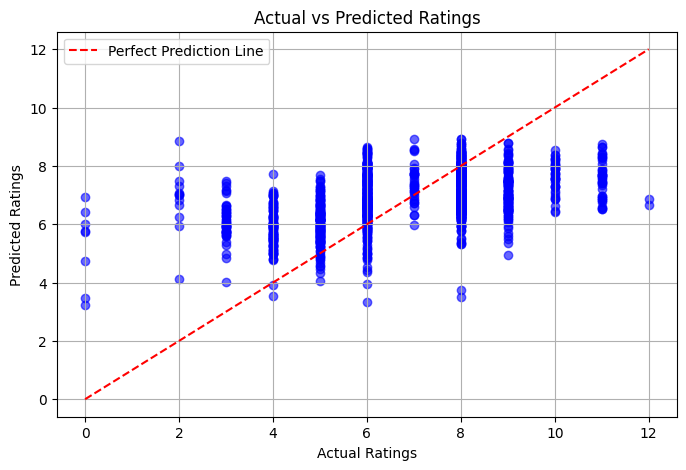

In [24]:
import numpy as np

# Plot the same scatter plot again
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')

# Draw the ideal prediction line
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction Line')

plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.grid(True)
plt.legend()
plt.show()
